<a href="https://colab.research.google.com/github/Alsyauqi0422/Scraping-data-twitter-Sentimen-Ferry-Irwandi/blob/main/T2_Crawl_data_twitter_Sentimen_Ferry_Irwandi_MUHAMMAD_AL_SYAUQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Ferry_Irwandi.csv")
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1966018496397250573,Thu Sep 11 05:58:31 +0000 2025,0,liat ferry irwandi ky liat professornya money ...,1966018496397250573,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/196601849639725...,1366358499932872709,NaN
1,1966017118677467520,Thu Sep 11 05:53:02 +0000 2025,0,Jirr aneh bat kalo ada alasan gw buat bisa ben...,1966017118677467520,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/196601711867746...,1032589603750916096,NaN
2,1966017109319889138,Thu Sep 11 05:53:00 +0000 2025,5,Menko Yusril menegaskan TNI tidak bisa melapor...,1966017109319889138,NaN,NaN,in,NaN,0,0,1,https://x.com/undefined/status/196601710931988...,69183155,NaN
3,1965558099479232683,Thu Sep 11 05:47:45 +0000 2025,3,@toe_giman Kontroversi Kriminalisasi Ferry Irw...,1966015787749249233,https://pbs.twimg.com/media/G0iw7x4aMAEbxai.jpg,toe_giman,in,NaN,0,3,5,https://x.com/undefined/status/196601578774924...,1611567480992043008,NaN
4,1966010586342596850,Thu Sep 11 05:44:46 +0000 2025,1,@shda_agatha_ enak kan manggilnya daripada cap...,1966015037405024601,NaN,shda_agatha_,in,NaN,0,0,0,https://x.com/undefined/status/196601503740502...,1184695438365974528,NaN


In [ ]:
df=df[['full_text','created_at']]
df

,full_text,created_at
0,liat ferry irwandi ky liat professornya money ...,Thu Sep 11 05:58:31 +0000 2025
1,Jirr aneh bat kalo ada alasan gw buat bisa ben...,Thu Sep 11 05:53:02 +0000 2025
2,Menko Yusril menegaskan TNI tidak bisa melapor...,Thu Sep 11 05:53:00 +0000 2025
3,@toe_giman Kontroversi Kriminalisasi Ferry Irw...,Thu Sep 11 05:47:45 +0000 2025
4,@shda_agatha_ enak kan manggilnya daripada cap...,Thu Sep 11 05:44:46 +0000 2025
...,...,...
887,@MineAyesha Selain Ferry Irwandi akun Neo Hist...,Tue Sep 09 01:01:59 +0000 2025
888,Ini ferry irwandi kayaknya pakai parfum aroma ...,Tue Sep 09 00:59:45 +0000 2025
889,Konten kreator Ferry Irwandi menegaskan diriny...,Tue Sep 09 00:53:56 +0000 2025
890,Aneh aja TNI masuk ke ranah politik. Emng sebe...,Tue Sep 09 00:51:11 +0000 2025


CLEANING DATA


In [ ]:
df.shape

(892, 2)

In [ ]:
df=df.drop_duplicates(subset=['full_text'])

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

,0
full_text,0
created_at,0


In [ ]:
df.shape

(886, 2)

In [ ]:
def clean_twitter_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?://\S+', '', text)

    text = re.sub(r'[^A-Za-z0-9 ]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [ ]:
df['full_text']=df['full_text'].str.lower()

In [ ]:
df

,full_text,created_at
0,liat ferry irwandi ky liat professornya money ...,Thu Sep 11 05:58:31 +0000 2025
1,jirr aneh bat kalo ada alasan gw buat bisa ben...,Thu Sep 11 05:53:02 +0000 2025
2,menko yusril menegaskan tni tidak bisa melapor...,Thu Sep 11 05:53:00 +0000 2025
3,kontroversi kriminalisasi ferry irwandi latar ...,Thu Sep 11 05:47:45 +0000 2025
4,enak kan manggilnya daripada capekcapek ngetik...,Thu Sep 11 05:44:46 +0000 2025
...,...,...
887,selain ferry irwandi akun neo historia harusny...,Tue Sep 09 01:01:59 +0000 2025
888,ini ferry irwandi kayaknya pakai parfum aroma ...,Tue Sep 09 00:59:45 +0000 2025
889,konten kreator ferry irwandi menegaskan diriny...,Tue Sep 09 00:53:56 +0000 2025
890,aneh aja tni masuk ke ranah politik emng seber...,Tue Sep 09 00:51:11 +0000 2025


NORMALISASI

In [ ]:
# Normalisasi
norm = {
    " yg ": " yang ",
    " tp ": "tetapi",
    " sdh ": "sudah",
    " nggak ": " tidak ",
    " gak ": " tidak ",
    " banget ": " sangat ",
    " jg ": " juga ",
    " tuk ": "untuk",
    " msh ": "masih"
}

def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,full_text,created_at
0,liat ferry irwandi ky liat professornya money ...,Thu Sep 11 05:58:31 +0000 2025
1,jirr aneh bat kalo ada alasan gw buat bisa ben...,Thu Sep 11 05:53:02 +0000 2025
2,menko yusril menegaskan tni tidak bisa melapor...,Thu Sep 11 05:53:00 +0000 2025
3,kontroversi kriminalisasi ferry irwandi latar ...,Thu Sep 11 05:47:45 +0000 2025
4,enak kan manggilnya daripada capekcapek ngetik...,Thu Sep 11 05:44:46 +0000 2025
...,...,...
887,selain ferry irwandi akun neo historia harusny...,Tue Sep 09 01:01:59 +0000 2025
888,ini ferry irwandi kayaknya pakai parfum aroma ...,Tue Sep 09 00:59:45 +0000 2025
889,konten kreator ferry irwandi menegaskan diriny...,Tue Sep 09 00:53:56 +0000 2025
890,aneh aja tni masuk ke ranah politik emng seber...,Tue Sep 09 00:51:11 +0000 2025


In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.0 MB/s eta 0:00:00


In [ ]:
# Stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

more_stop_words = ["tidak"]

# Dapatkan stopword dan tambahkan custom stopword
stop_word_factory = StopWordRemoverFactory()
stop_words = stop_word_factory.get_stop_words()
stop_words.extend(more_stop_words)

# Buat stopword remover dengan daftar stopword terbaru
stopword_remover = stop_word_factory.create_stop_word_remover()

def stopword(str_text):
    str_text = stopword_remover.remove(str_text)
    return str_text

# Aplikasikan fungsi stopword ke kolom 'full_text'
df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df.head()

,full_text,created_at
0,liat ferry irwandi ky liat professornya money ...,Thu Sep 11 05:58:31 +0000 2025
1,jirr aneh bat kalo alasan gw buat benci ferry ...,Thu Sep 11 05:53:02 +0000 2025
2,menko yusril menegaskan tni bisa melaporkan fe...,Thu Sep 11 05:53:00 +0000 2025
3,kontroversi kriminalisasi ferry irwandi latar ...,Thu Sep 11 05:47:45 +0000 2025
4,enak kan manggilnya capekcapek ngetik ferry ir...,Thu Sep 11 05:44:46 +0000 2025


In [ ]:
tokenized=df['full_text'].apply(lambda x:x.split())
tokenized

,full_text
0,"[liat, ferry, irwandi, ky, liat, professornya,..."
1,"[jirr, aneh, bat, kalo, alasan, gw, buat, benc..."
2,"[menko, yusril, menegaskan, tni, bisa, melapor..."
3,"[kontroversi, kriminalisasi, ferry, irwandi, l..."
4,"[enak, kan, manggilnya, capekcapek, ngetik, fe..."
...,...
887,"[ferry, irwandi, akun, neo, historia, harusnya..."
888,"[ferry, irwandi, kayaknya, pakai, parfum, arom..."
889,"[konten, kreator, ferry, irwandi, menegaskan, ..."
890,"[aneh, aja, tni, masuk, ranah, politik, emng, ..."


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []

    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)

    d_clean = ' '
    d_clean = " ".join(do)
    print(d_clean)

    return d_clean
tokenized= tokenized.apply(stemming)
tokenized.to_csv("/content/hasilPreprocessingFerry_Irwandi.csv", index=False)



liat ferry irwandi ky liat professornya money heist
jirr aneh bat kalo alas gw buat benci ferry irwandi karena nonton boruto
menko yusril tegas tni bisa lapor ferry irwandi atas cemar nama baik rujuk putus mk nyata individu bisa lapor via
kontroversi kriminalisasi ferry irwandi latar belakang ferry irwandi ceo malaka project sampai kritik anggap provokatif tni tni respons konsultasi polda metro jaya kait potensi tuntut hukum kritik respons publik parlemen
enak kan manggilnya capekcapek ngetik ferry irwandi panjang enak sebut kuwik wkwk
jendral2 sok sibuk ngurusin ferry irwandi mending benerin dulu deh prajurit banyak punya kerja samping mayoritas kerja halal kemarin2 yang jd beking judi sabung ayam libat curi mobil rental sekarang bunuh yang coklat yang ijo
kok suara kritis malah intimidasi henti kriminalisasi ferry irwandi usut tuntas teror direktur imparsial
tuju transparansi bijak penting buat hindar bentur kasus ferry irwandi update kompas 11 sep 2025 tni evaluasi langkah hukum mes

TRANSLATE


In [ ]:
!pip install Translate

In [ ]:
data = pd.read_csv("/content/hasilPreprocessingFerry_Irwandi.csv", encoding='latin1')
data.head()

,full_text
0,liat ferry irwandi ky liat professornya money ...
1,jirr aneh bat kalo alas gw buat benci ferry ir...
2,menko yusril tegas tni bisa lapor ferry irwand...
3,kontroversi kriminalisasi ferry irwandi latar ...
4,enak kan manggilnya capekcapek ngetik ferry ir...


In [ ]:
# Langkah 1: Instalasi library yang dibutuhkan
# Ini adalah library standar industri untuk tugas seperti ini
!pip install transformers[sentencepiece] torch pandas
!pip install sacremoses

# Langkah 2: Import library yang diperlukan
import pandas as pd
from transformers import MarianMTModel, MarianTokenizer
import torch

# --- PENGATURAN ---
input_file = "hasilPreprocessingFerry_Irwandi.csv"
output_file = "TerjemahanFerry_Irwandi.csv"
kolom_sumber = "full_text" # Kolom yang berisi teks Indonesia
kolom_target = "tweet_english" # Nama kolom untuk hasil terjemahan
batch_size = 16 # Proses 16 baris sekaligus untuk kecepatan
# ------------------

try:
    # Membaca file CSV Anda
    data = pd.read_csv(input_file)
    print(f"File '{input_file}' berhasil dibaca. Jumlah baris: {len(data)}.")

    # Mengambil semua teks dari kolom sumber
    texts_to_translate = data[kolom_sumber].astype(str).tolist()

    # Mempersiapkan model (hanya perlu dilakukan sekali)
    print("\nMempersiapkan model terjemahan (mungkin perlu beberapa saat)...")
    model_name = 'Helsinki-NLP/opus-mt-id-en'
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    print(f"Model siap dan berjalan di: {device}")

    # Proses terjemahan secara efisien dalam batch
    print("\nMemulai proses terjemahan (ini akan jauh lebih cepat)...")
    all_translations = []
    for i in range(0, len(texts_to_translate), batch_size):
        batch = texts_to_translate[i:i + batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
        translated_tokens = model.generate(**encoded)
        translations = tokenizer.batch_decode(translated_tokens, skip_special_tokens=True)
        all_translations.extend(translations)

    # Menambahkan hasil terjemahan sebagai kolom baru
    data[kolom_target] = all_translations

    # Menyimpan hasil akhir ke file CSV baru
    data.to_csv(output_file, index=False)

    print(f"\n✅ Proses Selesai! Hasil disimpan di '{output_file}'")
    print("Berikut 5 baris pertama dari hasil akhir:")
    print(data.head())

except FileNotFoundError:
    print(f"ERROR: File '{input_file}' tidak ditemukan.")
except Exception as e:
    print(f"Terjadi error: {e}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 18.3 MB/s eta 0:00:00
File 'hasilPreprocessingFerry_Irwandi.csv' berhasil dibaca. Jumlah baris: 886.

Mempersiapkan model terjemahan (mungkin perlu beberapa saat)...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/291M [00:00<?, ?B/s]

Model siap dan berjalan di: cuda

Memulai proses terjemahan (ini akan jauh lebih cepat)...

✅ Proses Selesai! Hasil disimpan di 'TerjemahanFerry_Irwandi.csv'
Berikut 5 baris pertama dari hasil akhir:
                                           full_text  \
0  liat ferry irwandi ky liat professornya money ...   
1  jirr aneh bat kalo alas gw buat benci ferry ir...   
2  menko yusril tegas tni bisa lapor ferry irwand...   
3  kontroversi kriminalisasi ferry irwandi latar ...   
4  enak kan manggilnya capekcapek ngetik ferry ir...   

                                       tweet_english  
0  Look at the ferry irwandi. Ky. Look at the pro...  
1  It's weird that I hate the ferry irwandi for w...  
2  Menko yuzril is firm tni can report the ferry ...  
3  The criminal controversy of ferry irwandi in t...  
4  It's good to call him tired of the long-irwand...  


In [ ]:
# Import library yang dibutuhkan (hanya pandas dan re)
import pandas as pd
import re

# --- PENGATURAN ---
# 1. Nama file input Anda yang sudah diterjemahkan (tapi masih kotor)
input_file = "TerjemahanFerry_Irwandi.csv"

# 2. Nama untuk file output yang akan bersih
output_file = "Terjemahan_Baru_Ferry_Irwandi.csv.csv"

# 3. Nama kolom yang ingin Anda bersihkan
kolom_untuk_dibersihkan = "tweet_english"
# ------------------

# --- Fungsi Pembersih Kode Warna ---
def bersihkan_kode_warna(teks):
    # Cek apakah inputnya adalah string
    if isinstance(teks, str):
        # Hapus pola fontcolor="..." beserta isinya
        teks = re.sub(r'fontcolor="[^"]*"', '', teks, flags=re.IGNORECASE)
        # Hapus sisa kata 'fontcolor' atau kode warna seperti #FFFF00
        teks = re.sub(r'fontcolor|#\s*[A-Fa-f0-9]{6}', '', teks, flags=re.IGNORECASE)
        # Hapus semua tanda kutip ganda
        teks = teks.replace('"', '')
        # Ganti spasi berlebih dengan satu spasi
        teks = re.sub(r'\s+', ' ', teks).strip()
        return teks
    # Kembalikan string kosong jika data bukan teks (misalnya, data kosong/NaN)
    return ""

# --- PROSES UTAMA ---
try:
    # 1. Baca file CSV Anda
    data = pd.read_csv(input_file)
    print(f"File '{input_file}' berhasil dibaca. Memproses {len(data)} baris.")

    # 2. Pastikan kolom yang akan dibersihkan ada di dalam file
    if kolom_untuk_dibersihkan not in data.columns:
        raise ValueError(f"Kolom '{kolom_untuk_dibersihkan}' tidak ditemukan di file. Mohon periksa nama kolom di Pengaturan.")

    # 3. Terapkan fungsi pembersihan pada kolom yang ditentukan
    print(f"Membersihkan kolom '{kolom_untuk_dibersihkan}' dari kode warna...")
    data[kolom_untuk_dibersihkan] = data[kolom_untuk_dibersihkan].apply(bersihkan_kode_warna)
    print("Pembersihan selesai.")

    # 4. Simpan hasilnya ke file CSV baru
    data.to_csv(output_file, index=False)

    print(f"\n✅ Proses Selesai! File yang sudah bersih disimpan di '{output_file}'")
    print("\nBerikut 5 baris pertama dari hasil yang sudah dibersihkan:")
    print(data.head())

except FileNotFoundError:
    print(f"ERROR: File '{input_file}' tidak ditemukan. Pastikan nama file sudah benar.")
except Exception as e:
    print(f"Terjadi error: {e}")

File 'TerjemahanFerry_Irwandi.csv' berhasil dibaca. Memproses 886 baris.
Membersihkan kolom 'tweet_english' dari kode warna...
Pembersihan selesai.

✅ Proses Selesai! File yang sudah bersih disimpan di 'Terjemahan_Baru_Ferry_Irwandi.csv.csv'

Berikut 5 baris pertama dari hasil yang sudah dibersihkan:
                                           full_text  \
0  liat ferry irwandi ky liat professornya money ...   
1  jirr aneh bat kalo alas gw buat benci ferry ir...   
2  menko yusril tegas tni bisa lapor ferry irwand...   
3  kontroversi kriminalisasi ferry irwandi latar ...   
4  enak kan manggilnya capekcapek ngetik ferry ir...   

                                       tweet_english  
0  Look at the ferry irwandi. Ky. Look at the pro...  
1  It's weird that I hate the ferry irwandi for w...  
2  Menko yuzril is firm tni can report the ferry ...  
3  The criminal controversy of ferry irwandi in t...  
4  It's good to call him tired of the long-irwand...  


LABELING

In [ ]:
data = pd.read_csv("/content/Terjemahan_Baru_Ferry_Irwandi.csv.csv", index_col=0)

# Reset indeks agar menjadi kolom biasa
data_dengan_nomor = data.reset_index()
data_dengan_nomor

,full_text,tweet_english
0,liat ferry irwandi ky liat professornya money ...,Look at the ferry irwandi. Ky. Look at the pro...
1,jirr aneh bat kalo alas gw buat benci ferry ir...,It's weird that I hate the ferry irwandi for w...
2,menko yusril tegas tni bisa lapor ferry irwand...,Menko yuzril is firm tni can report the ferry ...
3,kontroversi kriminalisasi ferry irwandi latar ...,The criminal controversy of ferry irwandi in t...
4,enak kan manggilnya capekcapek ngetik ferry ir...,It's good to call him tired of the long-irwand...
...,...,...
881,ferry irwandi akun neo historia harus lapor tni,ferrryirwandineohistoria account mustreport tni
882,ferry irwandi kayak pakai parfum aroma oud ken...,ferryirwandilike smelloudknow dominant charact...
883,konten kreator ferry irwandi tegas diri siap h...,The ferry irwandi content is self-assured. Rea...
884,aneh aja tni masuk ranah politik emng berapa b...,That's weird. It's been in politics. What's th...


In [ ]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [ ]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 282
Netral = 383
Negatif = 221

Total Data : 886


In [ ]:
data['klasifikasi'] = status
data

,tweet_english,klasifikasi
full_text,,
liat ferry irwandi ky liat professornya money heist,Look at the ferry irwandi. Ky. Look at the pro...,Netral
jirr aneh bat kalo alas gw buat benci ferry irwandi karena nonton boruto,It's weird that I hate the ferry irwandi for w...,Negatif
menko yusril tegas tni bisa lapor ferry irwandi atas cemar nama baik rujuk putus mk nyata individu bisa lapor via,Menko yuzril is firm tni can report the ferry ...,Positif
kontroversi kriminalisasi ferry irwandi latar belakang ferry irwandi ceo malaka project sampai kritik anggap provokatif tni tni respons konsultasi polda metro jaya kait potensi tuntut hukum kritik respons publik parlemen,The criminal controversy of ferry irwandi in t...,Negatif
enak kan manggilnya capekcapek ngetik ferry irwandi panjang enak sebut kuwik wkwk,It's good to call him tired of the long-irwand...,Positif
...,...,...
ferry irwandi akun neo historia harus lapor tni,ferrryirwandineohistoria account mustreport tni,Netral
ferry irwandi kayak pakai parfum aroma oud kenal dominant karakter produk lokal ada karakter kayak malah nama dominant liat aja video info lengkap,ferryirwandilike smelloudknow dominant charact...,Positif
konten kreator ferry irwandi tegas diri siap hadap proses hukum apabila satu siber satsiber tni benarbenar lapor kait duga tindak pidana baca sini,The ferry irwandi content is self-assured. Rea...,Positif


VISUALISASI

Data asli untuk WordCloud berhasil dimuat.


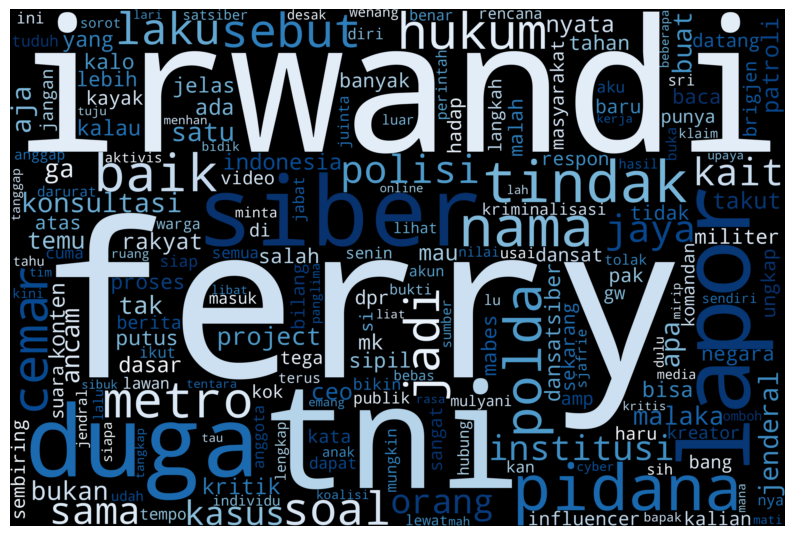

In [ ]:
# Langkah 1: Instalasi library jika belum ada
!pip install wordcloud

# Langkah 2: Import library
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# LANGKAH PENTING:
# Selalu muat ulang file ASLI untuk memastikan kolom 'full_text' ada.
try:
    data_for_wc = pd.read_csv("/content/hasilPreprocessingFerry_Irwandi.csv")
    print("Data asli untuk WordCloud berhasil dimuat.")

    # Gabungkan semua teks dari kolom 'full_text' menjadi satu string
    all_words = ' '.join([str(tweets) for tweets in data_for_wc['full_text']])

    # Buat dan tampilkan WordCloud
    wordcloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color='black',
        colormap='Blues_r',
        collocations=False,
        stopwords=STOPWORDS
    ).generate(all_words)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

except FileNotFoundError:
    print("ERROR: File '/content/hasilPreprocessingFerry_Irwandi.csv' tidak ditemukan. Pastikan file sudah di-upload.")

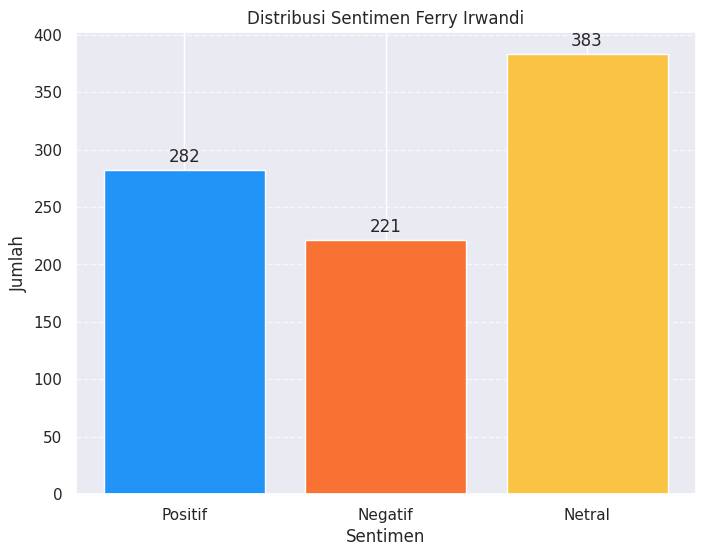

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f77233', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ferry Irwandi")

KLASIFIKASI SENTIMEN

In [ ]:
data

,tweet_english,klasifikasi
full_text,,
liat ferry irwandi ky liat professornya money heist,Look at the ferry irwandi. Ky. Look at the pro...,Netral
jirr aneh bat kalo alas gw buat benci ferry irwandi karena nonton boruto,It's weird that I hate the ferry irwandi for w...,Negatif
menko yusril tegas tni bisa lapor ferry irwandi atas cemar nama baik rujuk putus mk nyata individu bisa lapor via,Menko yuzril is firm tni can report the ferry ...,Positif
kontroversi kriminalisasi ferry irwandi latar belakang ferry irwandi ceo malaka project sampai kritik anggap provokatif tni tni respons konsultasi polda metro jaya kait potensi tuntut hukum kritik respons publik parlemen,The criminal controversy of ferry irwandi in t...,Negatif
enak kan manggilnya capekcapek ngetik ferry irwandi panjang enak sebut kuwik wkwk,It's good to call him tired of the long-irwand...,Positif
...,...,...
ferry irwandi akun neo historia harus lapor tni,ferrryirwandineohistoria account mustreport tni,Netral
ferry irwandi kayak pakai parfum aroma oud kenal dominant karakter produk lokal ada karakter kayak malah nama dominant liat aja video info lengkap,ferryirwandilike smelloudknow dominant charact...,Positif
konten kreator ferry irwandi tegas diri siap hadap proses hukum apabila satu siber satsiber tni benarbenar lapor kait duga tindak pidana baca sini,The ferry irwandi content is self-assured. Rea...,Positif


In [ ]:
dataset = data.reset_index().drop(['full_text'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [ ]:
import random

# Re-create the dataset_final in the format (text, label) from the 'data' DataFrame
# which already contains 'tweet_english' and 'klasifikasi' columns.
dataset = list(zip(data['tweet_english'], data['klasifikasi']))

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
    if n[1] == 'Positif':
        set_positif.append(n)
    elif n[1] == 'Negatif':
        set_negatif.append(n)
    else:
        set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
    train_set.append(n)

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
import nltk

nltk.download('punkt_tab')

cl = NaiveBayesClassifier(train_set)
print("Akurasi Test: ", cl.accuracy(dataset))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Akurasi Test:  0.7618510158013544


In [ ]:
# Labeling
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet, classifier=cl)

    if analysis.classify() == 'Positif':
        total_positif += 1
    elif analysis.classify() == 'Netral':
        total_netral += 1
    else:
        total_negatif += 1

    status.append(analysis.classify())
    total += 1

print(f'\nHasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')


Hasil Analisis Data:
Positif = 200
Netral = 511
Negatif = 175

Total Data : 886


In [ ]:
status = pd.DataFrame({"Klasifikasi Bayes": status}, index=data.index)
data['klasifikasi_bayes'] = status

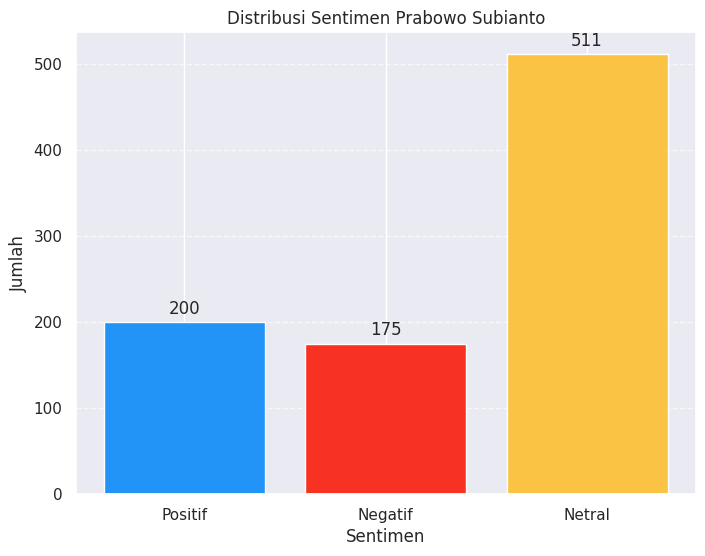

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set tema seaborn untuk tampilan yang lebih profesional
sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f73223', '#fac343'])

    # Menambahkan keterangan persentase
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Menambahkan grid
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Menambahkan label sumbu dan judul
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Prabowo Subianto")

In [ ]:
data

,tweet_english,klasifikasi,klasifikasi_bayes
full_text,,,
liat ferry irwandi ky liat professornya money heist,Look at the ferry irwandi. Ky. Look at the pro...,Netral,Netral
jirr aneh bat kalo alas gw buat benci ferry irwandi karena nonton boruto,It's weird that I hate the ferry irwandi for w...,Negatif,Negatif
menko yusril tegas tni bisa lapor ferry irwandi atas cemar nama baik rujuk putus mk nyata individu bisa lapor via,Menko yuzril is firm tni can report the ferry ...,Positif,Positif
kontroversi kriminalisasi ferry irwandi latar belakang ferry irwandi ceo malaka project sampai kritik anggap provokatif tni tni respons konsultasi polda metro jaya kait potensi tuntut hukum kritik respons publik parlemen,The criminal controversy of ferry irwandi in t...,Negatif,Negatif
enak kan manggilnya capekcapek ngetik ferry irwandi panjang enak sebut kuwik wkwk,It's good to call him tired of the long-irwand...,Positif,Negatif
...,...,...,...
ferry irwandi akun neo historia harus lapor tni,ferrryirwandineohistoria account mustreport tni,Netral,Netral
ferry irwandi kayak pakai parfum aroma oud kenal dominant karakter produk lokal ada karakter kayak malah nama dominant liat aja video info lengkap,ferryirwandilike smelloudknow dominant charact...,Positif,Positif
konten kreator ferry irwandi tegas diri siap hadap proses hukum apabila satu siber satsiber tni benarbenar lapor kait duga tindak pidana baca sini,The ferry irwandi content is self-assured. Rea...,Positif,Positif


In [ ]:
data_eval = [tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
    # Check if the tuple has enough elements before accessing
    if len(n) >= 3: # We need at least 3 elements to access index 1 and 2
        # Compare the original classification (index 1) with the Bayes classification (index 2)
        if n[1] == n[2]:
            # Print relevant information - the translated text and the two classifications
            print(f"Text: {n[0]}\nOriginal Classifier: {n[1]}\nBayes Classifier: {n[2]}\n")
    else:
        print("Tuple does not have enough elements for comparison.")

Text: Look at the ferry irwandi. Ky. Look at the professor.
Original Classifier: Netral
Bayes Classifier: Netral

Text: It's weird that I hate the ferry irwandi for watching Boruto.
Original Classifier: Negatif
Bayes Classifier: Negatif

Text: Menko yuzril is firm tni can report the ferry irwandi on a defamation. Good names refer to breaking up real individuals can report via
Original Classifier: Positif
Bayes Classifier: Positif

Text: The criminal controversy of ferry irwandi in the background of ferry irwandi ceo malaka project until criticism considers provocative t ni consulting response polda metro achieves a potential hook of potential lawsuits public response parliament
Original Classifier: Negatif
Bayes Classifier: Negatif

Text: Go for wisdom transparency. It's important to avoid falling apart. The ferry case irwandi updates the compass 11 sep 2025.
Original Classifier: Positif
Bayes Classifier: Positif

Text: Prof amir ilyas ferry irwandi wang institution tni is not an indiv

In [ ]:
import csv

# Nama file CSV output
output_csv_file = "evaluasi_klasifikasi.csv"

# Menulis data ke file CSV
with open(output_csv_file, 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)

    # Menulis header (opsional, tapi disarankan)
    csv_writer.writerow(['Text', 'Original Classifier', 'Bayes Classifier'])

    # Menulis data
    for row in data_eval:
        # Pastikan setiap baris memiliki jumlah elemen yang sesuai dengan header
        if len(row) >= 3:
            csv_writer.writerow(row)
        else:
            # Tangani kasus jika baris tidak memiliki cukup elemen
            print(f"Skipping row due to insufficient elements: {row}")


print(f"Data evaluasi berhasil diekspor ke '{output_csv_file}'")

Data evaluasi berhasil diekspor ke 'evaluasi_klasifikasi.csv'


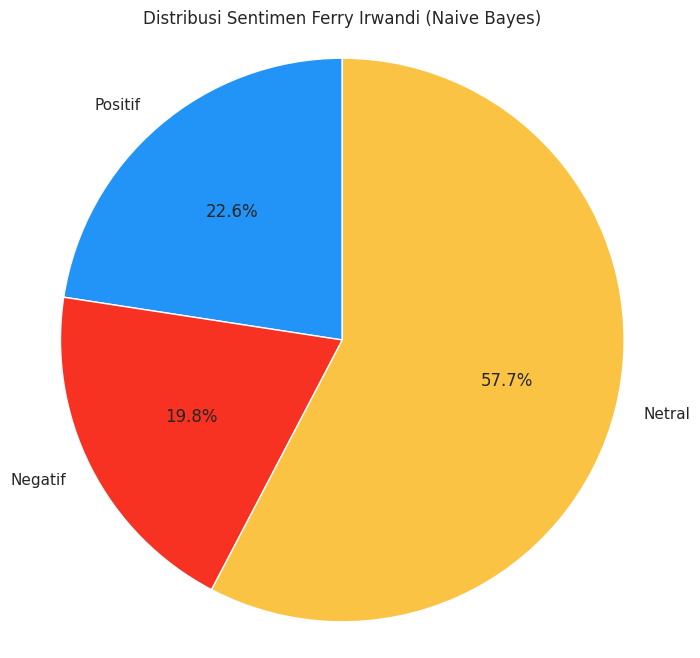

In [ ]:
import matplotlib.pyplot as plt

# Data jumlah sentimen (dari hasil analisis sebelumnya)
labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral] # Menggunakan variabel dari sel sebelumnya

# Membuat diagram lingkaran (pie chart)
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#2394f7', '#f73223', '#fac343'])
ax.axis('equal')  # Membuat lingkaran terlihat seperti lingkaran.

plt.title('Distribusi Sentimen Ferry Irwandi (Naive Bayes)')
plt.show()